https://www.kaggle.com/code/rohit4567/time-series-gan-with-pytorch

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd.variable import Variable
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = np.random.randn(10)
data

array([ 1.83187166,  1.26236743, -0.59612304, -0.31614666,  0.72925934,
       -2.94376307,  1.65491968, -0.56713955,  1.07693736, -0.33547647])

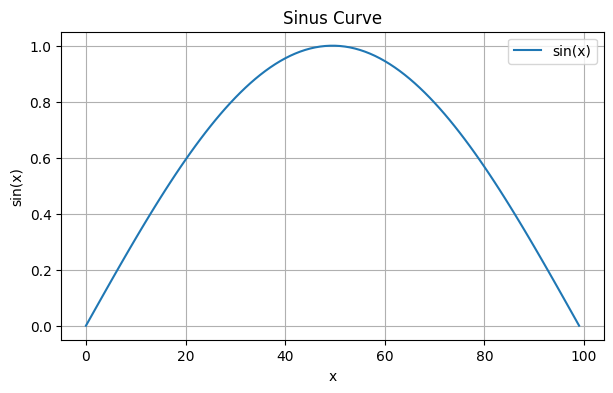

In [38]:
def generate_real_samples(n):
    # 定义数据点
    x = np.linspace(0, 1 * np.pi, n)  # 生成从0到2π的100个点
    y = np.sin(x)  # 计算每个点的正弦值
    # 使用索引作为x轴
    index = np.arange(n)  # 生成一个从0到n-1的整数序列

    return index, x, y
    
index, x, y = generate_real_samples(100)

# 绘制正弦曲线
plt.figure(figsize=(7, 4))  # 设置图形大小
plt.plot(index, y, label='sin(x)')  # 绘制曲线
plt.title('Sinus Curve')  # 添加标题
plt.xlabel('x')  # x轴标签
plt.ylabel('sin(x)')  # y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.show()  # 显示图形

In [24]:
# Generator network
class Generator(nn.Module):
    def __init__(self,latent_dim=128):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.model = nn.Sequential(
            nn.Linear(self.latent_dim,64), # input dim = latent_dim = (128,64)
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1)
        )

    def forward(self,x):
        return self.model(x)

In [46]:
# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.model = nn.Sequential(
        nn.Linear(1,128),
        nn.ReLU(),
        # nn.Linear(128,64),
        # nn.ReLU(),
        # nn.Linear(64,1),
        nn.Linear(128,1),
        nn.Dropout(p=0.2),
        nn.Sigmoid()
        )
    
    def forward(self,x):
        return self.model(x)

In [26]:
# Function to train the discriminator
def train_discriminator(discriminator, optimizer, real_data, fake_data):
    optimizer_D.zero_grad()
    
    # Train on real data
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, torch.ones_like(prediction_real))
    error_real.backward()
    
    # Train on fake data
    prediction_fake=discriminator(fake_data.detach())
    error_fake=loss(prediction_fake,torch.zeros_like(prediction_fake))
    error_fake.backward()

    optimizer_D.step()

    return error_real+error_fake

In [27]:
# Function to train the generator
def train_generator(generator, optimizer, fake_data):
    optimizer_G.zero_grad()
    
    prediction = discriminator(fake_data)
    error = loss(prediction, torch.ones_like(prediction))
    error.backward()
    
    optimizer_G.step()
    
    return error

In [47]:
# Hyperparameterss
batch_size = 100
lr = 3e-4
epochs = 10000

# Models and optimizer
generator = Generator()
discriminator = Discriminator()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)
loss = nn.BCELoss()
latent_dim = 128


# Training loop
for epoch in range(1,epochs+1):
    # Generate real and fake data
    real_data = torch.Tensor(generate_real_samples(batch_size)[2]).view(-1,1)
    fake_data = generator(Variable(torch.randn(batch_size,latent_dim)))
    
    # Train discriminator
    d_loss = train_discriminator(discriminator, optimizer_D, real_data, fake_data)
    
    # Train generator
    g_loss = train_generator(generator,optimizer_G,fake_data)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

Epoch: 100, D Loss: 1.3720462322235107, G Loss: 0.6633518934249878
Epoch: 200, D Loss: 1.354363203048706, G Loss: 0.771827757358551
Epoch: 300, D Loss: 1.3944556713104248, G Loss: 0.6470180749893188
Epoch: 400, D Loss: 1.36283278465271, G Loss: 0.6784127950668335
Epoch: 500, D Loss: 1.3532097339630127, G Loss: 0.777620255947113
Epoch: 600, D Loss: 1.4139865636825562, G Loss: 0.6322536468505859
Epoch: 700, D Loss: 1.1414176225662231, G Loss: 0.7651280164718628
Epoch: 800, D Loss: 1.50005042552948, G Loss: 1.0557972192764282
Epoch: 900, D Loss: 1.4064297676086426, G Loss: 0.7290760278701782
Epoch: 1000, D Loss: 1.3842581510543823, G Loss: 0.7162492275238037
Epoch: 1100, D Loss: 1.3695627450942993, G Loss: 0.7204843759536743
Epoch: 1200, D Loss: 1.4486794471740723, G Loss: 0.6126659512519836
Epoch: 1300, D Loss: 1.246950387954712, G Loss: 0.6950421929359436
Epoch: 1400, D Loss: 1.4452505111694336, G Loss: 0.7169004082679749
Epoch: 1500, D Loss: 1.382131814956665, G Loss: 0.731382310390472

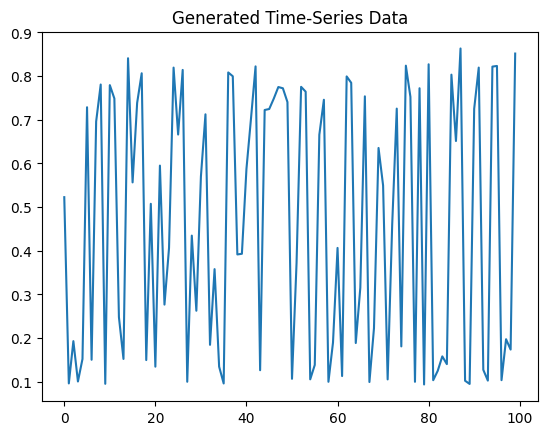

In [43]:
# Generate synthetic time-series data using the trained generator
generated_data = generator(Variable(torch.randn(100,latent_dim))).detach().numpy()

# Plot the generator
plt.plot(generated_data)
plt.title("Generated Time-Series Data")
plt.show()